In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("lstm_data.csv")
#data = data.drop(['week','Unnamed: 0'],axis=1)
data = data['region2']
data

0       0
1       0
2       0
3       0
4       0
       ..
2622    0
2623    0
2624    0
2625    0
2626    0
Name: region2, Length: 2627, dtype: int64

In [2]:
data = data
data = np.array(data)
data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [3]:
import numpy as np
def splitSequence(seq, n_steps):
    
    #Declare X and y as empty list
    X = []
    y = []
    
    for i in range(len(seq)):
        #get the last index
        lastIndex = i + n_steps
        
        #if lastIndex is greater than length of sequence then break
        if lastIndex > len(seq) - 1:
            break
            
        #Create input and output sequence
        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
        
        #append seq_X, seq_y in X and y list
        X.append(seq_X)
        y.append(seq_y)
        pass
    #Convert X and y into numpy array
    X = np.array(X)
    y = np.array(y)
    
    return X,y 
    
    pass

In [4]:
n_steps = 500
X, y = splitSequence(data, n_steps)

In [5]:
print(X.shape,y.shape)

(2127, 500) (2127,)


In [6]:
print(X[0],y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [7]:
n_features = 1
print(y.shape)

(2127,)


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
mod1 = tf.keras.Sequential()
mod1.add(layers.Dense(50, activation='sigmoid'))
mod1.add(layers.Dropout(0.2))
mod1.add(layers.Dense(100,activation='softmax'))
mod1.add(layers.Dense(1))

In [10]:
mod1.layers


In [11]:
mod1.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])


In [12]:
mod1.fit(X, y, epochs=50, verbose=1)


Epoch 1/50
67/67 [==============================] - 1s 2ms/step - loss: 0.0915 - accuracy: 0.8999
Epoch 2/50
67/67 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 0.8999
Epoch 3/50
67/67 [==============================] - 0s 2ms/step - loss: 0.0892 - accuracy: 0.8999
Epoch 4/50
67/67 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.8999
Epoch 5/50
67/67 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.8999
Epoch 6/50
67/67 [==============================] - 0s 1ms/step - loss: 0.0830 - accuracy: 0.8999
Epoch 7/50
67/67 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.8999
Epoch 8/50
67/67 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.8999
Epoch 9/50
67/67 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.8999
Epoch 10/50
67/67 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.8999
Epoch 11/50
67/67 [

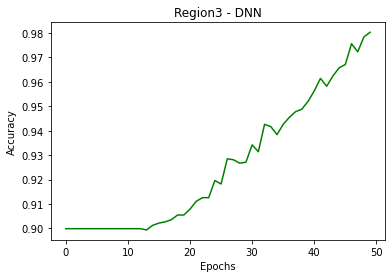

In [14]:
import numpy as np
import matplotlib.pyplot as plt
xaxis = np.arange(0, 50)
res = np.array([0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8999,0.8994,0.9013,0.9022
,0.9027, 0.9036,0.9055,0.9055,0.9079,0.9111,0.9126,0.9126,0.9196,0.9182,0.9285,0.9281,0.9267,0.9271,0.9342,0.9314,0.9426,0.9417
,0.9384,0.9426,0.9455,0.9478,0.9488,0.9520,0.9563,0.9614,0.9582,0.9624,0.9657,0.9671,0.9756,0.9723,0.9784,0.9803])
plt.title("Region3 - DNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(xaxis, res, color ="green")
plt.show()

In [21]:
test_data = X[0:100]
print(test_data)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
